<a href="https://colab.research.google.com/github/Nurbanu-yilmaz/Blacklisted-Credit-Cards-Linked-List/blob/master/Copy_of_Group53_finalreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AIRBNB PRICE - GROUP 53**
-> **Nurbanu Yılmaz 25531**
->**Beste Karaca 26290**


#**1.Introduction**
->Our question is how roomtypes and neighborhood groups affect the price level in certain locations. Based on this question our aim is to make price prediction using some machine learning techniques. The aim of the project is to find the places according to budgets by making predictions of the price levels. Many things might affect the price level but mostly neighbourhood groups and roomtypes make significant changes in prices. That is why these two factors are the factors that we focused on our project.



->Since samples are used in our research our project is supervised, since we are going to solve our question by using linear regression and decision tree model of machine learning techniques. Firstly two different datasets were imported and worked on our project which are "AB_NYC_2019.csv". Based on these datas we were able to make price prediction. The end goal of our project is to find price leveles of local places of Nyc such as price level of Brooklyn, Queens.




-> We have  different datasets. The datasets that we used are for roomtypes and  about neighbourhood groups and these  dataset are given as excel files tables. From these data sets we are able to see how prices are changing over different places. For example when roomtypes change the prices immediately change and also what kind of neighbourhood groups exist really matters for the price level of that location.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('AB_NYC_2019.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
data.isnull().sum()
data.dropna(how='any',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

In [ ]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
data = data[data['price'] > 0]
data = data[data.price < (data['price'].mean() + 3 * data['price'].std())]

 ->In the above steps, we first examined what was happening in our data, then we divided them into appropriate groups, and checked if the lines were empty. Then, since our topic is the price, we decided to check the price periodically. Because the outlier would affect our data and we eliminated them to get a clearer result.

#**DATA EXPLORATION**






Text(0.5, 1.0, 'Room Type vs Price')

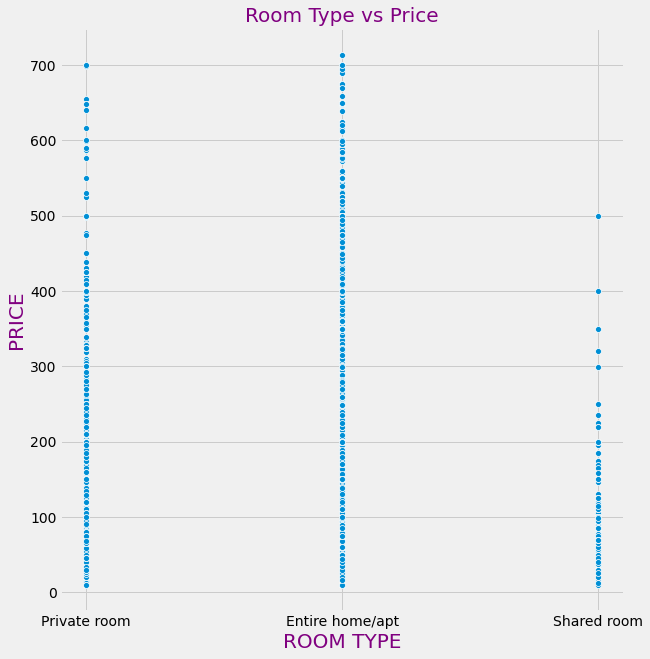

In [ ]:
#We got help from Kaggle
plt.figure(figsize = (9,10))
sns.scatterplot(x='room_type', y = 'price', data = data)

plt.ylabel("PRICE", size = 20, color = 'purple')
plt.xlabel("ROOM TYPE", size = 20,color = 'purple')
plt.title("Room Type vs Price", size = 20, color = 'purple')

In [ ]:
price_town = data.groupby(['neighbourhood_group'])['price'].mean().reset_index()
price_town = price_town.sort_values('price', ascending=False).reset_index(drop=True)
price_town

,neighbourhood_group,price
0,Manhattan,163.360146
1,Brooklyn,115.454712
2,Queens,91.921796
3,Staten Island,89.964968
4,Bronx,78.824742


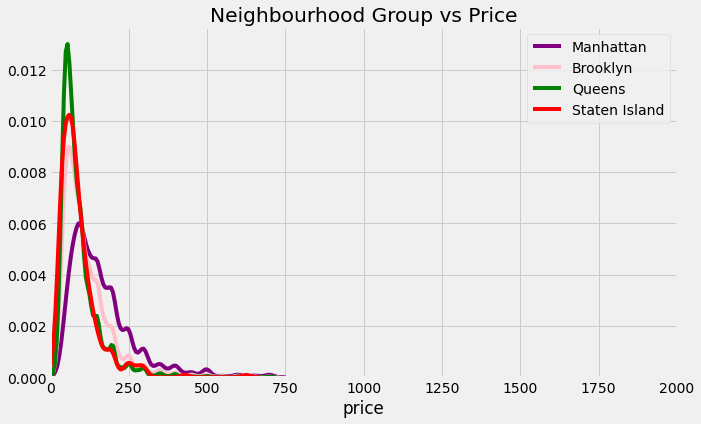

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data[data.neighbourhood_group=='Manhattan'].price,color='purple',hist=False,label='Manhattan')
sns.distplot(data[data.neighbourhood_group=='Brooklyn'].price,color='pink',hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group=='Staten Island'].price,color='red',hist=False,label='Staten Island')
plt.title('Neighbourhood Group vs Price')
plt.xlim(0,2000)
plt.show()

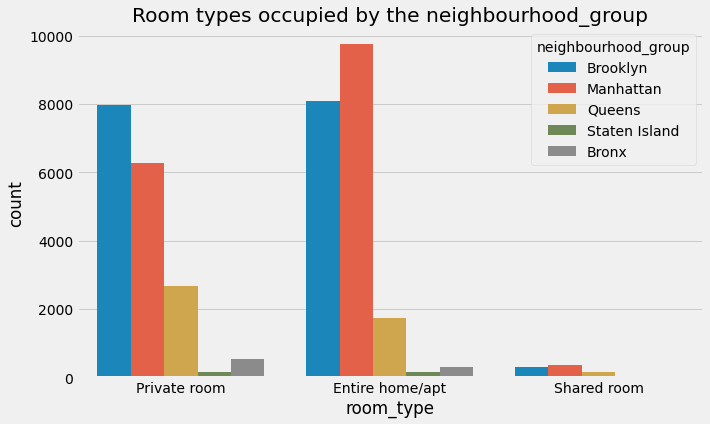

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

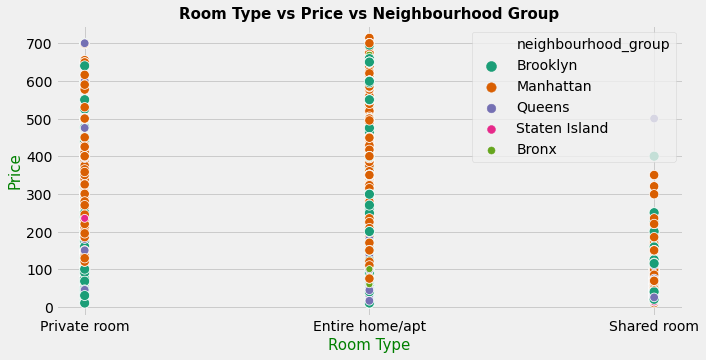

In [ ]:
#We got help from Kaggle

plt.figure(figsize=(10,5))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 100), palette="Dark2", data=data)

plt.xlabel("Room Type", size=15, color = 'green')
plt.ylabel("Price", size=15, color = 'green')
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')



->In the data exploration section, we decided to make the exploration by visualizing the data. We first compared the room type with the price, then we compared the neighborhood group and the price. After that, we compared neighborhood group and room type and finally compared all three. As we have guessed here, we have seen that neighborhood and room type affect the price. Relation between price and roomtypes are shown in above figure. Graph we obtained show the roomtype prices so that we are able to predict the price level of the locals of NYC.


In [ ]:
data['price_log'] = np.log(data.price+1)

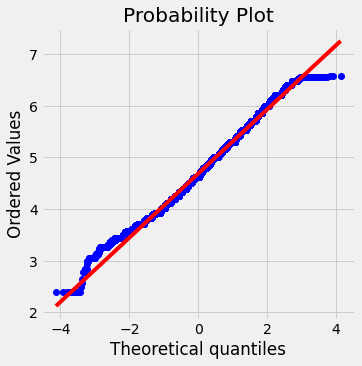

In [ ]:
plt.figure(figsize=(5,5))
stats.probplot(data['price_log'], plot=plt)
plt.show()

In [ ]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

At this part of our project we checked if there is null. Null was checked because if there is empty lines we should fullfill with mean values.

#**2.Machine Learning Models**


In [ ]:
data.drop(['name','host_id','id','host_name', 'last_review','reviews_per_month','price_log'], axis=1, inplace=True)
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129


In [ ]:
def Encode(datab):
    for column in data.columns[data.columns.isin(['neighbourhood_group','neighbourhood', 'room_type'])]:
        data[column] = data[column].factorize()[0]
    return data
code = Encode(data.copy)   
code.head(5) 

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,1,1,40.75362,-73.98377,1,225,1,45,2,355
3,0,2,40.68514,-73.95976,1,89,1,270,1,194
4,1,3,40.79851,-73.94399,1,80,10,9,1,0
5,1,4,40.74767,-73.97500,1,200,3,74,1,129


->We prefer %10 for testing , %90 for training


In [ ]:
x = code.drop(columns=['price'])
y = code['price']
columns = x.columns
scaler = StandardScaler()
x[columns] = scaler.fit_transform(x[columns])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

43627    274
31855    125
3887     200
32334     35
34524     54
Name: price, dtype: int64

In [ ]:
x_train.shape

(34649, 9)

**Linear Regression**


In [ ]:
regression=LinearRegression()
regression.fit(x_train,y_train)
y_prediction=regression.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score is {}".format(r2_score(y_test,y_prediction)))
print("Mean Squared Error is {}".format(mean_squared_error(y_test, y_prediction)))

R2 Score is 0.24518989480152587
Mean Squared Error is 6617.949008440941


**KNeighbors Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regression=KNeighborsRegressor()
regression.fit(x_train,y_train)
y_predict=regression.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score is {}".format(r2_score(y_test,y_predict)))
print("Mean Squared Error is {}".format(mean_squared_error(y_test, y_predict)))

R2 Score is 0.4045061643487352
Mean Squared Error is 5221.111657142857


**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predicti=DTree.predict(x_test)
from sklearn.metrics import r2_score
print("R2 Score is {}".format(r2_score(y_test,y_predicti)))
print("Mean Squared Error is {}".format(mean_squared_error(y_test, y_predicti)))

R2 Score is 0.2482419613542488
Mean Squared Error is 6581.198254359926


Text(0.5, 1.0, 'Decision Tree Regressor')

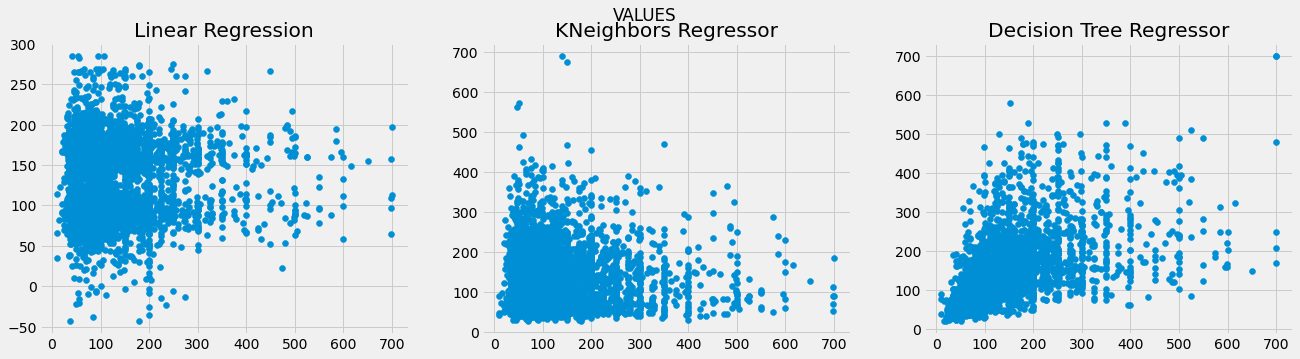

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('VALUES')

ax1.scatter(y_test, y_prediction)
ax1.set_title('Linear Regression')

ax2.scatter(y_test, y_predict)
ax2.set_title('KNeighbors Regressor')

ax3.scatter(y_test, y_predicti)
ax3.set_title('Decision Tree Regressor')

->Here, we used Linear Regression, KNeighbors Regression and Decision Tree Regression techniques from Machine Learning models. We first set up our data for 10% testing and 90% training, and then we looked at and evaluated the results using regression models.

->KNEighbors Regression was the best result of these regression models. Because R2 value is big here and Mean Square Error value is small. In our ideal model, R2 value should be big and Mean Square Error should be small. Because the large R2 value shows us that regression model fit is good. Then the best result is Decision Tree Regression. The worst was Linear Regression. We can see in the graphics at the bottom whether they are fitting or not. While the KNeighbors and Decision Tree chart has a certain line or density, the Linear chart is very scattered and nothing clear.

->Our question would affect the price and room type. In the techniques we used to classify and then use this data, we found that these data affect each other and are connected. In Room Type, private room is always more expensive, then the entire home is more expensive and the cheapest is shared rooms. Of course, there may be minor changes, but when we look at the general situation, this is the case. Neighborhood group rankings progress from expensive to cheap 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'. Our graphics also support them. As a result, we saw the relationship of these two variables with price and showed that they had great effects on price.

->After analyzing all relationships between the neighbourhood groups, roomtypes and prices we were able to predict the price levels. Based on these price levels our reccomendation is that people could put themselves in the categories according to their budget and make their selections accordingly. They should select the places according to their budget so that when they visit these places they would be able to afford their needs. Otherwise if they choose to go somewhere which is really expensive and not suitable to their budget they might face some criticial and serious problems. This situation also will have effect on their social lives as well. In addition to neighbour groups, we have examined the room types and the relationship of roomtypes with the price. Based on the graphs and results we obtained people's live could become easier while choosing their rooms. Moreover, they are going to able to see directly the average prices of different roomtypes in different locations of NYC and make their choices easier without any concern.One more reccomendation, they can follow the patterns of the change of price according to our graphs for their future needs. From our point of view, roomtype and neighbourhood groups really have effect on price so according to us when people choose to go somewhere these to things are main things which should come to their minds while making their selections.

>**REFERENCES**

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb

https://www.kaggle.com/duygut/airbnb-nyc-price-prediction